<font color='pink'>**Homework exercise**</font>

Hello there! In this notebook, I will analyze the data from the lexical decision task I made for the session 3-5.

The experiment consisted of 20 trials, in which one real or fake Dutch word was presented.
Participants were asked to judge whether the word is a real Dutch word or not.

There are three participants, but it was all me doing the experiment.

## Import Packages
Let's import required packages first!

In [44]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 
import plotnine as gg 
from plotnine import ggplot
import scipy.stats as stats

## Preprocessing
Next, I will combine all the participants' data into one (trials)

In [36]:
participants = pd.read_csv('participants_ldt.csv')

trials = pd.concat(pd.read_csv(f'results/{participant_id}.csv') for participant_id in participants['id'])

# rename the "Unnamed: 0" column to "trial order"
trials.rename(columns={'Unnamed: 0': 'trial_order'}, inplace=True)

# convert the reaction time from in second to in milliseconds
trials['RT'] = trials['reaction_time'] * 1000

# export the trials as a csv file.
trials.to_csv('trials.csv', index=False)
trials

,trial_order,trial,cond,start_time,end_time,key,id,reaction_time,RT
0,0,recht,HF,2.718182,3.838300,z,P_165435,1.120117,1120.117411
1,1,gals,none,5.352657,6.295809,m,P_165435,0.943152,943.152054
2,2,slont,none,7.810418,8.713127,m,P_165435,0.902709,902.708648
3,3,baby,HF,10.226432,10.973984,z,P_165435,0.747552,747.552167
4,4,boek,HF,12.486627,13.213963,z,P_165435,0.727336,727.335821
5,5,imams,LF,14.726606,15.430361,m,P_165435,0.703755,703.754865
6,6,goont,none,16.943319,17.694142,m,P_165435,0.750824,750.823777
7,7,plan,HF,19.207660,19.846547,z,P_165435,0.638888,638.887570
8,8,women,none,21.359490,22.022061,z,P_165435,0.662571,662.570842
9,9,buidels,LF,23.540104,24.230132,m,P_165435,0.690029,690.028658


Now, preprocessing is done! 

## Descriptive Statistics
Let's take a look at what the data looks like.

First, I'll make a table summarizing the data based on the three conditions.

In [37]:
trials = pd.read_csv('trials.csv')
merged = trials.merge(participants, on='id')

summary = merged.groupby(by='cond').aggregate(
    mean_RT=pd.NamedAgg('RT', np.mean),
    median_RT=pd.NamedAgg('RT', np.median),
    std_RT=pd.NamedAgg('RT', np.std),
    mean_age=pd.NamedAgg('age', np.mean),
    std_age=pd.NamedAgg('age', np.std)
)

summary.reset_index(inplace=True)
summary

,cond,mean_RT,median_RT,std_RT,mean_age,std_age
0,HF,770.644871,734.072362,153.705174,25.666667,1.290994
1,LF,709.639438,703.754865,101.921522,25.666667,1.290994
2,none,759.563359,750.034606,128.257515,25.666667,1.268541


Ok, the data seem to be good.
But a picture is worth a thousand words, right?

Let's make a density plot and a violin plot grouped by each condition!

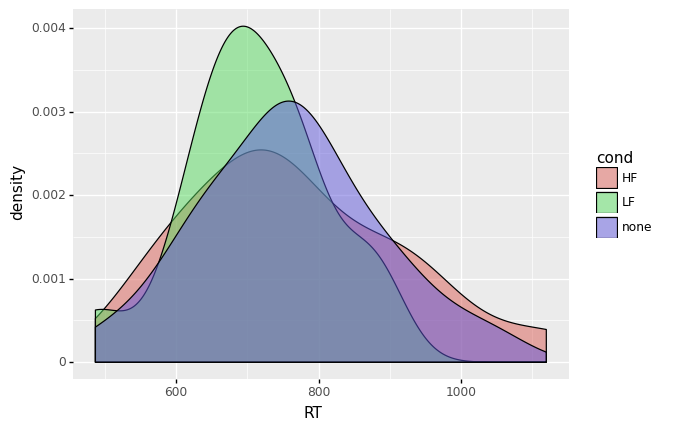

In [38]:
density_plot = (
    ggplot(gg.aes(x = 'RT', fill = 'cond'), data=trials) +
    gg.geom_density(alpha = 0.5)
)
density_plot.draw()
plt.show()

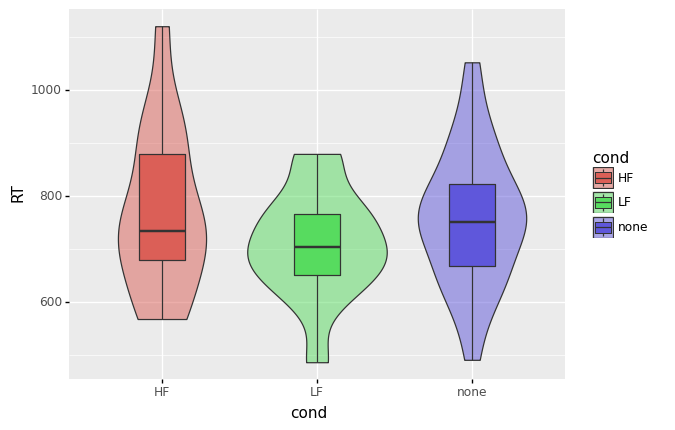

In [39]:
violinplot = (
    ggplot(gg.aes(x = 'cond', y = 'RT', fill = 'cond'), data=trials) +
    gg.geom_violin(alpha=0.5) +
    gg.geom_boxplot(width=0.3)
)
violinplot.draw()
plt.show()

So far so good. Next, I'll remove the "none" condition because they are filler trials.

In [40]:
trials_clean = trials.query('cond == ["HF", "LF"]')
trials_clean

,trial_order,trial,cond,start_time,end_time,key,id,reaction_time,RT
0,0,recht,HF,2.718182,3.838300,z,P_165435,1.120117,1120.117411
3,3,baby,HF,10.226432,10.973984,z,P_165435,0.747552,747.552167
4,4,boek,HF,12.486627,13.213963,z,P_165435,0.727336,727.335821
5,5,imams,LF,14.726606,15.430361,m,P_165435,0.703755,703.754865
7,7,plan,HF,19.207660,19.846547,z,P_165435,0.638888,638.887570
9,9,buidels,LF,23.540104,24.230132,m,P_165435,0.690029,690.028658
10,10,hield,HF,25.742965,26.511447,m,P_165435,0.768482,768.482130
11,11,polders,LF,28.025344,28.688923,z,P_165435,0.663579,663.578993
12,12,ponten,LF,30.202228,31.081533,z,P_165435,0.879305,879.305057
17,17,hese,LF,41.768017,42.638338,z,P_165435,0.870322,870.321511


## Statistical Analysis
Okay. Now it's time for stats!

First, I'll test whether the sample comes from a normal distribution.

<AxesSubplot:xlabel='RT', ylabel='Count'>

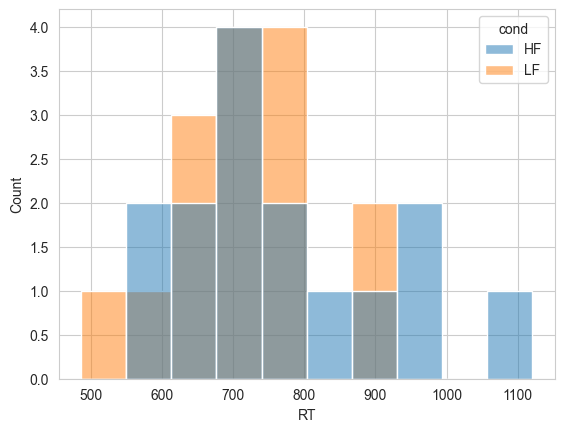

In [43]:
# Use Seaborn for a simple histogram
sns.set_style('whitegrid')
sns.histplot(trials_clean, x="RT", hue="cond", bins=10)

Nice! It looks like the data are normally distributed.

Let's try the Shapiro-Wilk test for normality.

In [61]:
shapiro_results = trials_clean.groupby(by='cond').aggregate(
    shapiro=pd.NamedAgg('RT',stats.shapiro))

shapiro_results.reset_index(inplace=True)
shapiro_results

,cond,shapiro
0,HF,"(0.9354420304298401, 0.32849547266960144)"
1,LF,"(0.9714531898498535, 0.8789640069007874)"


Awesome!

The test suggests that the sample comes from a normal distribution! (although this is inaccurate description of the test results, but let's not make it complicated for this homework!)

Finally, I can run a mixed-effects model!

Here is the summary of the model:
- Response variable: RT
- Fixed effects: Word frequency (high or low)
- Random effects: Each group (I don't know exactly what each group is though...)

In [62]:
import statsmodels.formula.api as smf

lmm = smf.mixedlm("RT ~ cond", trials_clean, groups = 'id', re_formula='1')
lmm_f = lmm.fit()
print(lmm_f.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: RT        
No. Observations:   30      Method:             REML      
No. Groups:         3       Scale:              13176.8654
Min. group size:    10      Log-Likelihood:     -176.8685 
Max. group size:    10      Converged:          Yes       
Mean group size:    10.0                                  
----------------------------------------------------------
            Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
----------------------------------------------------------
Intercept   770.645   51.631 14.926 0.000  669.451 871.839
cond[T.LF]  -61.005   41.916 -1.455 0.146 -143.158  21.148
id Var     5361.815   60.387                              



Okay. So there are no significant difference in RT between low frequent words and high frequent ones.
This is unsurprising because I run the experiment by myself and don't speak Dutch.